In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras import Model
from sklearn import svm

In [ ]:
# Define the path to the folder containing images
folder_path = '/content/drive/MyDrive/DB'

In [ ]:

data = []
labels = []

# **Using Canny**

In [ ]:

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.tif'):
            img_path = os.path.join(root, file)
            img = cv2.imread(img_path, 0)


            blur = cv2.GaussianBlur(img,(5,5),0)
            edges = cv2.Canny(blur,100,200)
            resized_img = cv2.resize(edges, (64, 64))
            data.append(resized_img.flatten())
            labels.append(root.split('/')[-1])

In [ ]:
# Convert lists to numpy arrays.
data = np.array(data)
labels = np.array(labels)

In [ ]:
from numpy.core.fromnumeric import shape
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

clf = svm.SVC()

# Convert lists to numpy arrays.
data = np.array(data)
labels = np.array(labels)

# Convert string labels to numerical values
le = LabelEncoder()
labels = le.fit_transform(labels)

# Split data into train and test sets with a ratio of 80:20
train_data, test_data = train_test_split(np.hstack((labels.reshape(-1, 1), data)), test_size=0.2, random_state=42)

X_train, y_train = train_data[:, 1:], train_data[:, 0]
X_test, y_test = test_data[:, 1:], test_data[:, 0]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit an SVC model on the reduced data
clf = SVC(kernel='linear')
clf.fit(X_train_pca, y_train)


# Train SVC model.
clf.fit(X_train_pca, y_train)

#Test SVC model on test set and print accuracy score.
accuracy_score = clf.score(X_test_pca, y_test)
print('Accuracy:', accuracy_score)

Accuracy: 0.8125


In [ ]:
print(X_test_pca)
print(y_train)

[[ -849.39050358  -977.13047921  -754.10707998 ...    82.49771752
     18.25295833    39.02332062]
 [ 1740.4977074   -401.72607246   371.02668413 ...    57.35660777
    -48.25167254   -14.16929099]
 [  875.74875147 -1317.16682587  -662.66313589 ...    57.05832177
     73.41060554     6.01752968]
 ...
 [ 1702.96399502    72.11508134   -69.4176295  ...    94.73725699
    -65.25249102    -3.77065637]
 [-1391.88179057   247.70720541  -368.29761018 ...   -26.92297529
    -53.15895792   -52.17191797]
 [-1092.51055077    70.02098914   241.81845976 ...    11.45802309
     -8.07096519    41.99617554]]
[2 0 3 0 3 2 2 2 0 2 0 1 0 3 2 3 2 2 1 2 1 3 1 1 0 0 1 3 2 3 2 2 1 3 2 3 0
 2 0 1 3 1 3 2 1 3 2 1 3 2 1 2 1 2 1 3 1 2 0 1 0 1 2 1 3 1 0 0 2 3 2 0 2 0
 2 3 0 3 0 3 2 1 3 0 2 2 0 2 0 0 0 3 3 2 0 1 2 3 3 2 3 0 2 1 1 2 0 2 3 3 2
 0 0 0 1 3 2 0 2 1 1 1 3 2 0 2 3 1 2 3 3 0 1 2 0 2 1 0 2 3 1 0 0 0 2 3 0 2
 3 2 1 0 1 2 1 3 0 1 0 3 0 1 0 1 2 1 3 3 3 0 2 1 3 2 0 2 0 1 1 0 1 1 1 2 1
 0 2 0 0 3 2 1 0 3 3 3 0 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Make predictions on test data
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('\n')
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.8125


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        20
           2       0.50      0.75      0.60        12
           3       0.79      0.55      0.65        20

    accuracy                           0.81        64
   macro avg       0.82      0.82      0.81        64
weighted avg       0.84      0.81      0.81        64



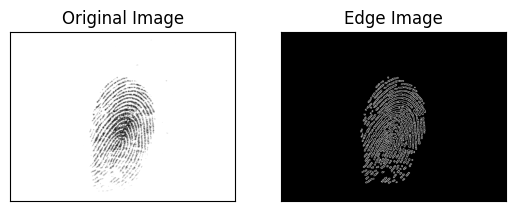

In [ ]:


plt.subplot(121),plt.imshow(img ,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# **Using Harris**


In [ ]:

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.tif'):
            # Load image
            img_path = os.path.join(root, file)
            img2 = cv2.imread(img_path, 0)

In [ ]:
# Convert to grayscale
rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

In [ ]:

block_size = 2
aperture_size = 3
k = 0.04

dst = cv2.cornerHarris(gray, block_size, aperture_size, k)

dst_norm = np.empty_like(dst)
cv2.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

edges = cv2.threshold(dst_norm, threshold, 255, cv2.THRESH_BINARY)[1]

In [ ]:
# Convert lists to numpy arrays.
data = np.array(data)
labels = np.array(labels)

In [ ]:
from numpy.core.fromnumeric import shape
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = svm.SVC()


data = np.array(data)
labels = np.array(labels)
le = LabelEncoder()
labels = le.fit_transform(labels)

train_data, test_data = train_test_split(np.hstack((labels.reshape(-1, 1), data)), test_size=0.2, random_state=42)
X_train, y_train = train_data[:, 1:], train_data[:, 0]
X_test, y_test = test_data[:, 1:], test_data[:, 0]

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


clf = SVC(kernel='linear')
clf.fit(X_train_pca, y_train)


# Test SVC model on test set and print accuracy score
y_pred = clf.predict(X_test_pca)
accuracy_score = accuracy_score(y_test.ravel(), y_pred.ravel())
print('Accuracy:', accuracy_score)

Accuracy: 0.828125


In [ ]:
print(X_train_pca)
print(X_test_pca)

[[ 1569.87478096  -378.27389788   342.78985867 ...   170.00774135
     33.61386624   125.56664571]
 [-1354.25249729   533.467733      54.96737331 ...   -63.61007078
     57.70334359    44.72965343]
 [ 1009.23053749 -1074.42880098  1074.18969622 ...  -410.92458732
    239.73441888   316.9068414 ]
 ...
 [  918.99671177   -80.30954005 -1015.92246972 ...   -72.22270011
    311.79488196   349.02244955]
 [ -784.26623619   800.63078414   571.2005338  ...   186.60368188
    -67.93614101    41.7474404 ]
 [ 1264.11932456  -723.53271717   -27.53442601 ...   -97.1809453
   -158.30855376   -21.15988199]]
[[ -849.39049926  -977.14021276  -754.10706302 ...   -64.57865392
     65.43107739    43.93760059]
 [ 1740.4976405   -401.72140546   371.01824842 ...    66.55757853
      6.55613583   -84.96360216]
 [  875.74876203 -1317.17301371  -662.66290129 ...  -106.11862755
    -19.97060954   102.86737319]
 ...
 [ 1702.96388868    72.12964947   -69.41040517 ...   -30.80987485
     36.97997116   -35.16322042]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Make predictions on test data
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('\n')
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.828125


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        20
           2       0.53      0.75      0.62        12
           3       0.80      0.60      0.69        20

    accuracy                           0.83        64
   macro avg       0.83      0.84      0.83        64
weighted avg       0.85      0.83      0.83        64



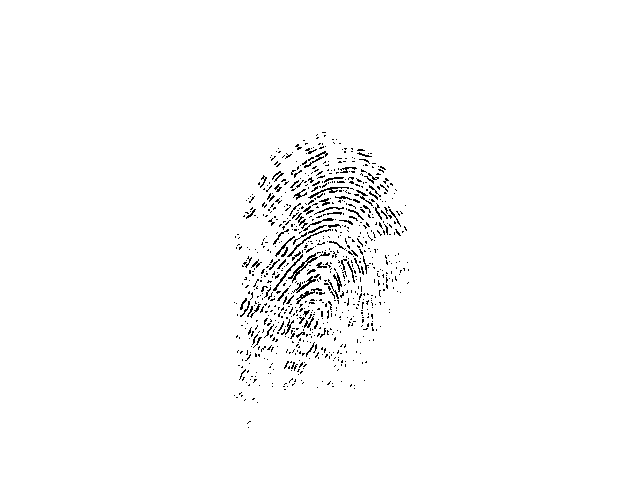

In [ ]:
# Display the result
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Using SIFT


In [ ]:
import cv2
import numpy as np
import os

data = []
labels = []

# Initialize SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Loop through all subfolders and load images with .tif extension.
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.tif'):
            # Load image.
            img_path = os.path.join(root, file)
            img = cv2.imread(img_path, 0)

            # Apply Gaussian blur to reduce noise.
            blur = cv2.GaussianBlur(img, (5,5), 0)

            # Detect SIFT keypoints and descriptors.
            kp, des = sift.detectAndCompute(blur, None)

            # Resize image to 64x64 pixels.
            resized_img = cv2.resize(des, (64, 64))

            # Append image data and label to lists.
            data.append(resized_img.flatten())
            labels.append(root.split('/')[-1])

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
# labels

In [ ]:
data

array([[72.09375   ,  8.566406  , 28.417969  , ...,  0.        ,
         0.        ,  2.203125  ],
       [51.78125   , 39.21875   , 28.828125  , ...,  0.        ,
         0.        ,  0.        ],
       [60.046875  , 15.515625  , 22.828125  , ...,  0.        ,
         0.265625  , 16.046875  ],
       ...,
       [31.917969  , 71.90234   , 18.929688  , ..., 33.839844  ,
        26.429688  , 16.777344  ],
       [21.878906  ,  6.7382812 , 97.35547   , ...,  2.296875  ,
         0.74609375,  8.988281  ],
       [22.28125   , 18.046875  , 19.921875  , ...,  5.25      ,
         0.9375    ,  9.203125  ]], dtype=float32)

In [ ]:
from numpy.core.fromnumeric import shape
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

clf = svm.SVC()

# Convert lists to numpy arrays.
data = np.array(data)
labels = np.array(labels)

# Convert string labels to numerical values
le = LabelEncoder()
labels = le.fit_transform(labels)

# Split data into train and test sets with a ratio of 80:20
train_data, test_data = train_test_split(np.hstack((labels.reshape(-1, 1), data)), test_size=0.2, random_state=42)

X_train, y_train = train_data[:, 1:], train_data[:, 0]
X_test, y_test = test_data[:, 1:], test_data[:, 0]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit an SVC model on the reduced data
clf = SVC(kernel='linear')
clf.fit(X_train_pca, y_train)


# Train SVC model.
clf.fit(X_train_pca, y_train)

#Test SVC model on test set and print accuracy score.
accuracy_score = clf.score(X_test_pca, y_test)
print('Accuracy:', accuracy_score)

Accuracy: 0.765625


In [ ]:
y_train

array([1., 3., 2., 3., 2., 1., 1., 1., 3., 1., 3., 0., 3., 2., 1., 2., 1.,
       1., 0., 1., 0., 2., 0., 0., 3., 3., 0., 2., 1., 2., 1., 1., 0., 2.,
       1., 2., 3., 1., 3., 0., 2., 0., 2., 1., 0., 2., 1., 0., 2., 1., 0.,
       1., 0., 1., 0., 2., 0., 1., 3., 0., 3., 0., 1., 0., 2., 0., 3., 3.,
       1., 2., 1., 3., 1., 3., 1., 2., 3., 2., 3., 2., 1., 0., 2., 3., 1.,
       1., 3., 1., 3., 3., 3., 2., 2., 1., 3., 0., 1., 2., 2., 1., 2., 3.,
       1., 0., 0., 1., 3., 1., 2., 2., 1., 3., 3., 3., 0., 2., 1., 3., 1.,
       0., 0., 0., 2., 1., 3., 1., 2., 0., 1., 2., 2., 3., 0., 1., 3., 1.,
       0., 3., 1., 2., 0., 3., 3., 3., 1., 2., 3., 1., 2., 1., 0., 3., 0.,
       1., 0., 2., 3., 0., 3., 2., 3., 0., 3., 0., 1., 0., 2., 2., 2., 3.,
       1., 0., 2., 1., 3., 1., 3., 0., 0., 3., 0., 0., 0., 1., 0., 3., 1.,
       3., 3., 2., 1., 0., 3., 2., 2., 2., 3., 3., 3., 2., 2., 0., 2., 2.,
       3., 1., 0., 0., 0., 1., 2., 0., 3., 1., 0., 3., 3., 0., 1., 3., 2.,
       3., 1., 3., 3., 0.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Make predictions on test data
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('\n')
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.765625


              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67        20
         1.0       0.57      0.67      0.62        12
         2.0       1.00      0.90      0.95        20
         3.0       0.69      0.92      0.79        12

    accuracy                           0.77        64
   macro avg       0.75      0.77      0.75        64
weighted avg       0.78      0.77      0.77        64



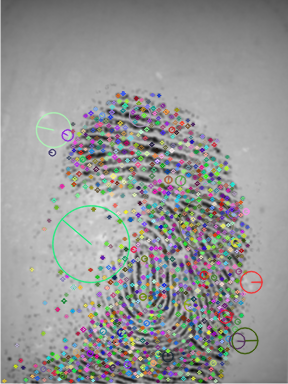

SIFT descriptors:
[[115.  84.  22. ...   0.   0.   0.]
 [  0.   0.   0. ...  78.  35.   6.]
 [ 24.   3.   0. ...  20.  16.  39.]
 ...
 [124.  28.   0. ...   0.   4.  16.]
 [ 27. 133.  37. ...   0.   2.  49.]
 [ 29.   5.   6. ...   0.   0.   0.]]


In [ ]:
img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show image with keypoints
cv2_imshow(img_kp)

# Print descriptors
print("SIFT descriptors:")
print(des)